# Excercise 3 - Predictive checks
- Check the posterior predictive distribution with experimental data distribution. (model: stan3)
- Check the model comparing model prior distribution with experimental data distribution and formulate conclusion. (model: stan4)
- Plot your own histogram for prior example to better visualise the result

In [16]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [17]:
#Data read fromm normal.csv
df = pd.read_csv(r'normal.csv')
N = len(df.index)
y = df['value']

# Posterior Predictive


In [18]:
model1 = CmdStanModel(stan_file='stan3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [19]:
result1 = model1.sample(data={'N':N, 'y':y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [20]:
result1.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-53.0000,0.0250,1.100,-55.00,-53.0000,-52.00,1700.0,2600.0,1.0
mu,-0.0350,0.0020,0.110,-0.21,-0.0340,0.14,2800.0,4100.0,1.0
sigma,1.0000,0.0013,0.073,0.91,1.0000,1.20,3100.0,4500.0,1.0
y_rep[1],-0.0290,0.0160,1.000,-1.70,-0.0360,1.70,4259.0,6235.0,1.0
y_rep[2],-0.0530,0.0160,1.000,-1.70,-0.0710,1.70,4170.0,6105.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[96],-0.0330,0.0170,1.000,-1.70,-0.0340,1.60,3868.0,5663.0,1.0
y_rep[97],-0.0520,0.0170,1.000,-1.80,-0.0610,1.70,3928.0,5752.0,1.0
y_rep[98],-0.0080,0.0170,1.000,-1.70,-0.0180,1.70,3928.0,5751.0,1.0


In [21]:
#Convertion to arviz InferenceData
arviz_result1 = az.from_cmdstanpy(
    posterior=result1,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)
arviz_result1

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<AxesSubplot:xlabel='y / y_rep'>

C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


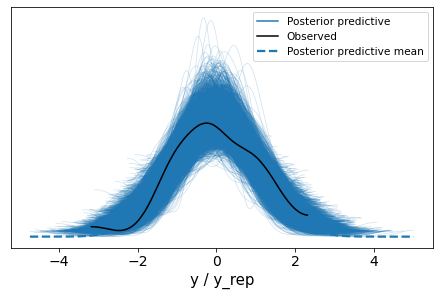

In [22]:
#Arviz plot
az.plot_ppc(arviz_result1,data_pairs={"y": "y_rep"})

# Prior Predictive

In [23]:
model2 = CmdStanModel(stan_file='stan4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [24]:
result2 = model2.sample(data={'N':N}, 
                            chains = 1,
                            fixed_param=True,
                            seed = 523833
                            )

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [25]:
result2.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0000,NaN,0.0,0.000,0.0000,0.0,NaN,NaN,NaN
mu,-0.0220,0.031,1.0,-1.700,-0.0150,1.6,1100.0,10000.0,1.0
sigma,0.7900,0.019,0.6,0.041,0.6700,1.9,1000.0,9800.0,1.0
y_prior[1],-0.0540,0.042,1.4,-2.300,-0.0740,2.3,1126.0,10937.0,1.0
y_prior[2],0.0360,0.045,1.4,-2.100,-0.0077,2.4,1003.0,9739.0,1.0
...,...,...,...,...,...,...,...,...,...
y_prior[96],-0.0490,0.042,1.3,-2.200,-0.0060,2.0,1045.0,10144.0,1.0
y_prior[97],0.0027,0.050,1.4,-2.100,0.0300,2.2,770.0,7475.0,1.0
y_prior[98],-0.0190,0.041,1.4,-2.100,-0.0500,2.3,1178.0,11437.0,1.0


In [26]:
#Convertion to arviz InferenceData
arviz_result2 = az.from_cmdstanpy(
    prior=result2,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result2

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

<AxesSubplot:xlabel='y / y_prior'>

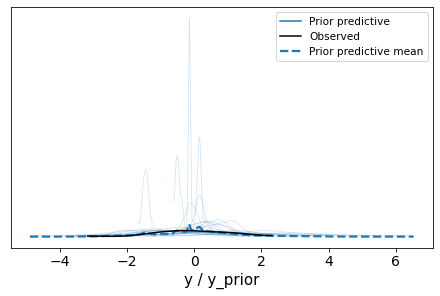

In [27]:
az.plot_ppc(arviz_result2, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-9.61215 , -9.001726, -8.391302, -7.780878, -7.170454, -6.56003 ,
        -5.949606, -5.339182, -4.728758, -4.118334, -3.50791 , -2.897486,
        -2.287062, -1.676638, -1.066214, -0.45579 ,  0.154634,  0.765058,
         1.375482,  1.985906,  2.59633 ,  3.206754,  3.817178,  4.427602,
         5.038026,  5.64845 ,  6.258874,  6.869298,  7.479722,  8.090146,
         8.70057 ]),
 <a list of 100 BarContainer objects>)

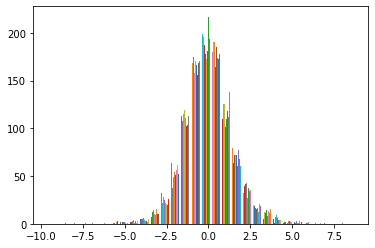

In [42]:
#Draw y_prior histogram
y_prior = result2.stan_variable('y_prior')
plt.hist(y_prior, bins = 30)